# Clean Data for PM3

In [19]:
# Import needed libraries
import pandas as pd
import pymongo
import matplotlib.pyplot as plt

# Access database
client = pymongo.MongoClient("mongodb://localhost:27017/")

# Database Name
db = client["pm3-osm"]

# Collection Name
col = db["osm"]

# Create a cursor of data that should be cleaned
cursor = col.find({"amenity": "atm"})

# Transform it into a df
df = pd.DataFrame(list(cursor))

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 100 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   _id                       1727 non-null   object
 1   amenity                   1727 non-null   object
 2   name                      414 non-null    object
 3   operator                  1727 non-null   object
 4   wheelchair                390 non-null    object
 5   id                        1727 non-null   object
 6   lat                       1727 non-null   object
 7   lon                       1727 non-null   object
 8   cash_in                   103 non-null    object
 9   check_date                337 non-null    object
 10  indoor                    74 non-null     object
 11  opening_hours             381 non-null    object
 12  created_by                6 non-null      object
 13  atm                       6 non-null      object
 14  name:de                

In [20]:
df['operator'].unique()

array(['SKB', 'Bank Cler', 'Glarner Kantonalbank', 'UBS', 'GKB',
       'Raiffeisen', 'PostFinance', 'Berner Kantonalbank',
       'Zürcher Kantonalbank', 'Credit Suisse', 'St.Galler Kantonalbank',
       'Thurgauer Kantonalbank', 'Bezirkssparkasse Uster',
       'Schwyzer Kantonalbank', 'BCF', 'BCJ', 'Aargauische Kantonalbank',
       'Banque Cantonale Vaudoise', 'Sparcassa',
       'Basellandschaftliche Kantonalbank', 'Berner Kantonalbank AG',
       'Banque Cantonale Neuchâteloise', 'BBO', 'Acrevis Bank',
       'Basler Kantonalbank', 'Valiant', 'Banca popolare di Sondrio',
       'Sparkasse Bodensee', 'Raiffeisen AG', 'Neue Aargauer Bank',
       "Caisse D'Epargne De Nyon", "Caisse d'épargne de Nyon", 'ZKB',
       'Migros Bank', 'Raiffeisenbank Jungfrau', 'Kantonal Bank', 'Coop',
       'AKB Fahrwangen', 'IRB Interregio Bank', 'Bünder Kantonalbank',
       'Luzerner Kantonalbank', 'Zürcher Landbank',
       'BS Bank Schaffhausen', 'Graubündner Kantonalbank',
       'Schaffhauser K

In [21]:
# Make a smaller selection of the df
# selection = df[['_id','operator','lat', 'lon']]

# drop rows in which operators do have NA's
selection = df.dropna(subset=['operator'])


In [22]:
# Change names of the most common operators

selection['operator'].replace({'poste': 'Post',
                               'Poste': 'Post',
                               'postfinance': 'PostFinance',
                               'Die Post' : 'Post',
                               'Banque cantonale de Fribourg':'BCF',
                               'Schweizerische Post':'Post',
                               'La Poste': 'Post',
                               'La Posta': 'Post',
                               'Kantonalbank?':'ZKB',
                               'PosteFinance':'PostFinance',
                               'Credit Suisse':'CS',
                               'UBS Switzerland': 'UBS',
                               'Zürcher Kantonalbank':'ZKB',
                               'Postfinance': 'PostFinance',
                               'Banque Cantonale Neuchâteloise':'BCN',
                               'St. Galler Kantonalbank':'St.Galler Kantonalbank',
                               'BCVs' :'BCV',
                               ' BCV':'BCV',
                               'Neuer Aargauer Bank':'Neue Aargauer Bank',
                               'Valiant Bank AG':'Valiant',
                               'Migrosbank': 'Migros Bank',
                               'Kantonal Bank':'ZKB',
                               'Die Schweizerische Post':'Post',
                               'Raifeisenbank':'Raiffeisen',
                               'Raiffeisenbank':'Raiffeisen',
                               'Raiffeisen Schweiz':'Raiffeisen',
                               'Valiant Bank': 'Valiant',
                               'PostFinance AG':'PostFinance',
                               'Post Finance':'PostFinance',
                               'Kantonalbank':'ZKB',
                               'BCVS':'BCV',
                               'Banque Raiffeisen':'Raiffeisen',
                               'Neue Aargauer Bank AG':'Neue Aargauer Bank'
                              }, inplace=True)



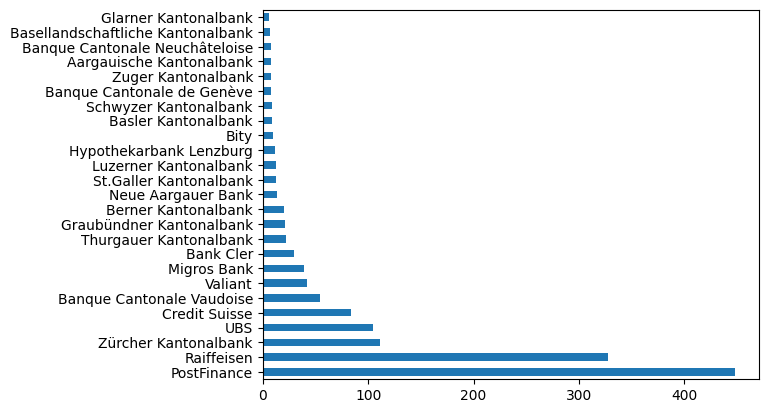

In [23]:
selection['operator'].value_counts().head(25).plot(kind = 'barh')
plt.show()


In [26]:
# Create a .json file with the cleaned data:
selection.to_json('cleandata.json', orient='records', default_handler=str)
